# Лабораторная работа №1
## Разведочный анализ данных. Исследование и визуализация данных.
Цель лабораторной работы: изучение различных методов визуализация данных.

Краткое описание. Построение основных графиков, входящих в этап разведочного анализа данных.

Выбран датасет load_iris из Scikit-learn

### Текстовое описание выбранного Вами набора данных.
В качестве набора данных мы будем использовать Ирисы Фишера.
Ирисы Фишера — это набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. 

Ирисы Фишера состоят из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

Длина наружной доли околоцветника (англ. sepal length);
Ширина наружной доли околоцветника (англ. sepal width);
Длина внутренней доли околоцветника (англ. petal length);
Ширина внутренней доли околоцветника (англ. petal width).

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
iris = load_iris()

In [3]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [4]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


### Основные характеристики датасета

In [5]:
# Первые 5 строк датасета
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
# Размер датасета - 150 строк, 5 колонок
data.shape

(150, 5)

In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 150


In [8]:
# Список колонок
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [9]:
# Список колонок с типами данных
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

In [10]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

sepal length (cm) - 0
sepal width (cm) - 0
petal length (cm) - 0
petal width (cm) - 0
target - 0


В нашем датасете нет пропусков

In [11]:
# Основные статистические характеристки набора данных
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
# Определим уникальные значения для целевого признака
data.target.unique()

array([0., 1., 2.])

Целевой признак содержит значения 0, 1, 2

### Визуальное исследование

#### Диаграмма рассеяния

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

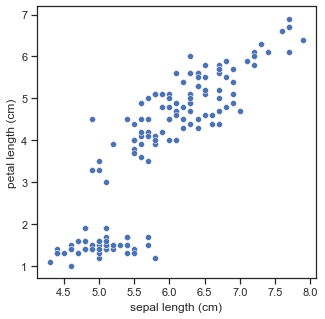

In [15]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='sepal length (cm)', y='petal length (cm)', data=data)

Можно видеть что между полями sepal length (cm) и petal length (cm) пристутствует почти линейная зависимость.

Посмотрим насколько на эту зависимость влияет целевой признак.

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

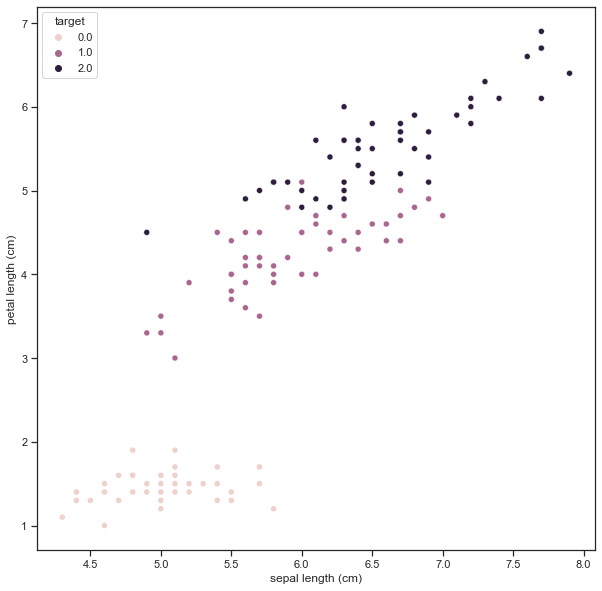

In [16]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='sepal length (cm)', y='petal length (cm)', data=data, hue='target')

#### Гистограмма

/Users/toffee/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

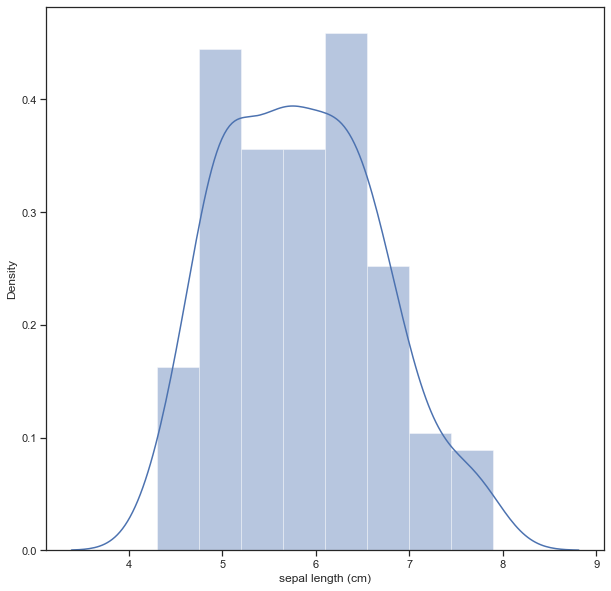

In [20]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['sepal length (cm)'])

#### Joinplot

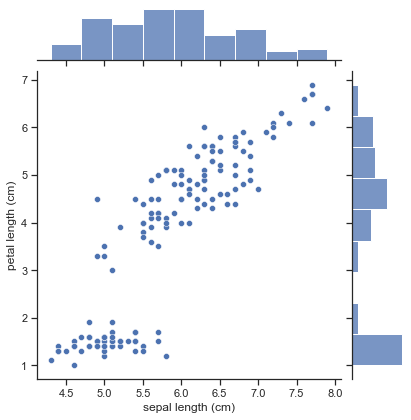

In [21]:
sns.jointplot(x='sepal length (cm)', y='petal length (cm)', data=data)

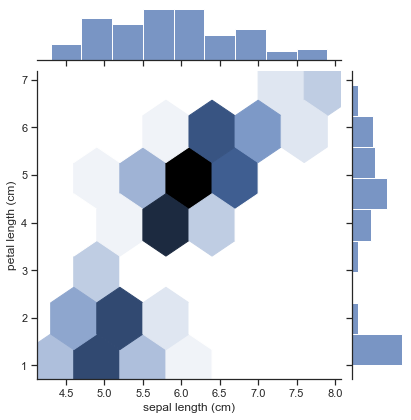

In [22]:
sns.jointplot(x='sepal length (cm)', y='petal length (cm)', data=data, kind="hex")

#### Парные диаграммы

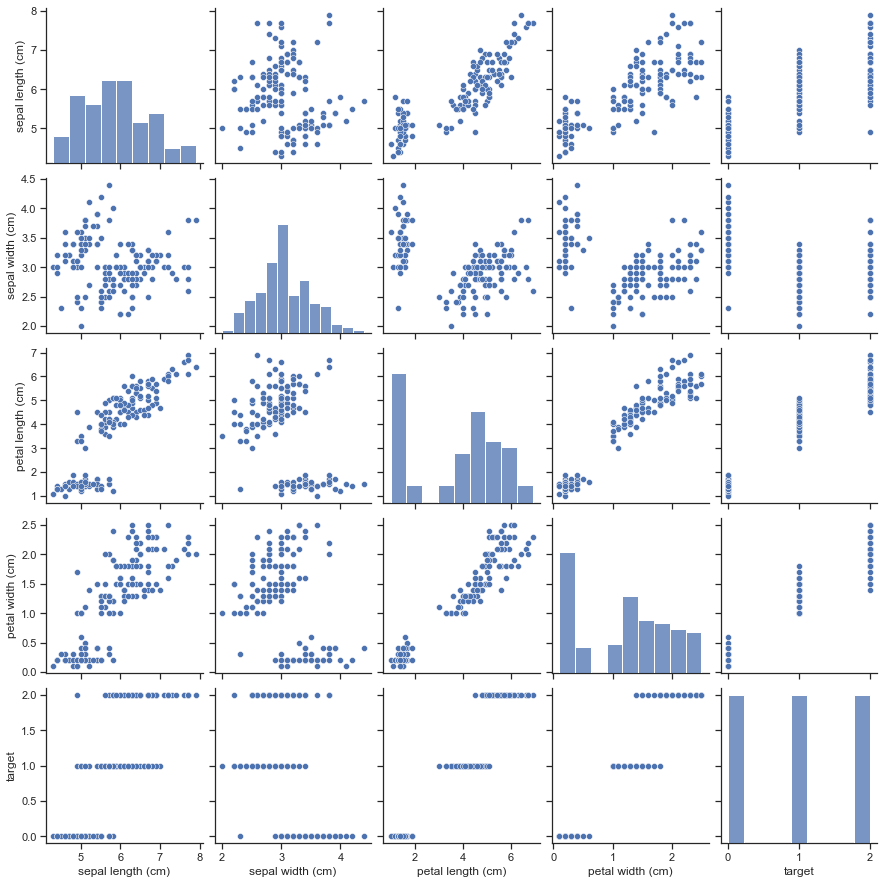

In [23]:
sns.pairplot(data)

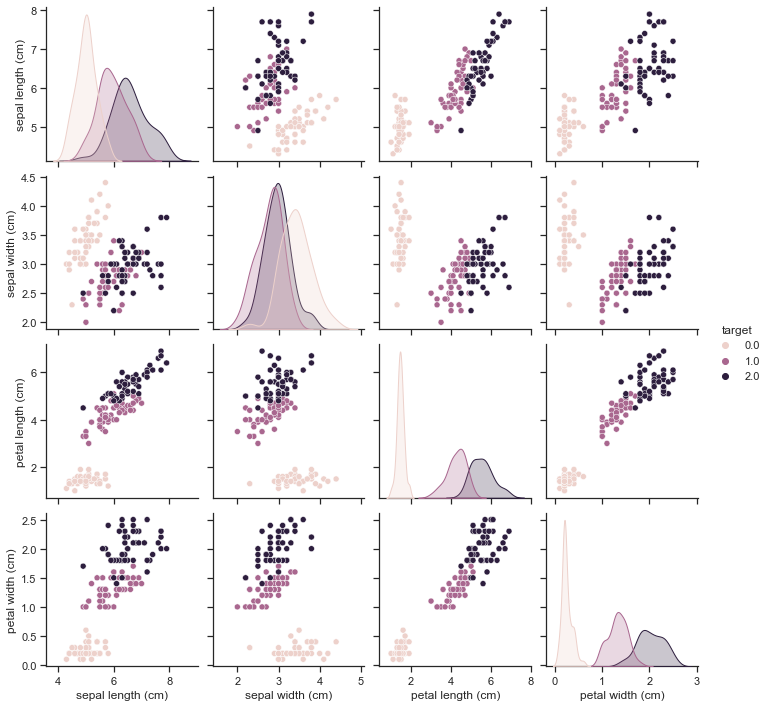

In [24]:
sns.pairplot(data, hue="target")

#### Ящик с усами

<AxesSubplot:xlabel='sepal length (cm)', ylabel='target'>

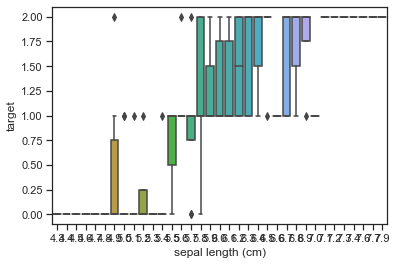

In [25]:
# Распределение параметра sepal length (cm) сгруппированные по target.
sns.boxplot(x='sepal length (cm)', y='target', data=data)

#### Violin plot

/Users/toffee/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

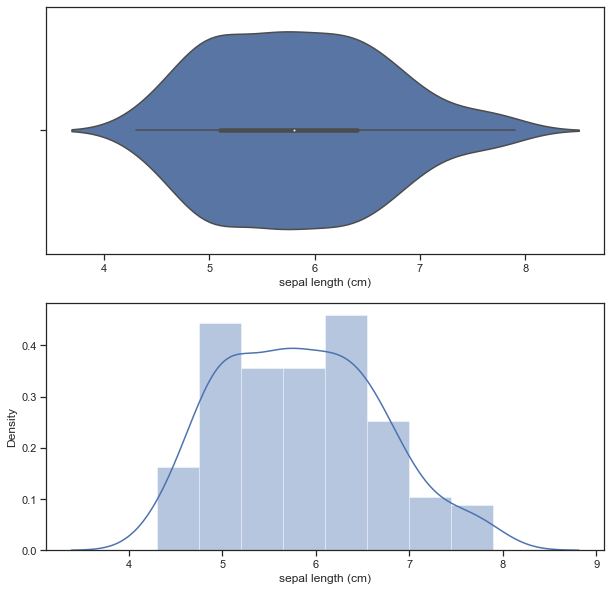

In [26]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['sepal length (cm)'])
sns.distplot(data['sepal length (cm)'], ax=ax[1])

<AxesSubplot:xlabel='target', ylabel='sepal length (cm)'>

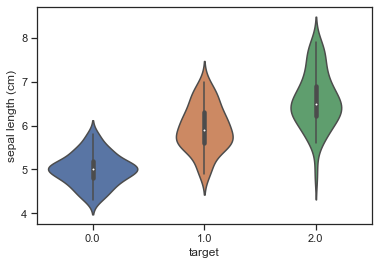

In [27]:
# Распределение параметра sepal length (cm) сгруппированные по target.
sns.violinplot(x='target', y='sepal length (cm)', data=data)

### Информация о корреляции признаков.

In [28]:
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

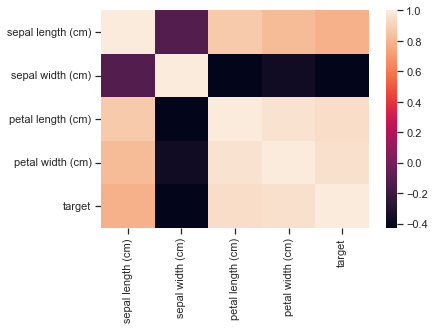

In [29]:
sns.heatmap(data.corr())

<AxesSubplot:>

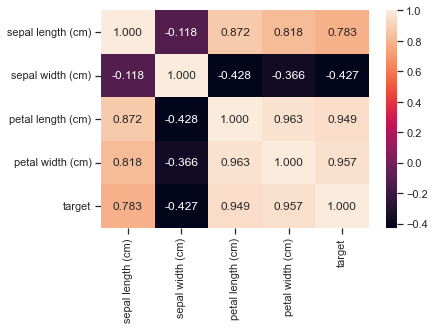

In [30]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

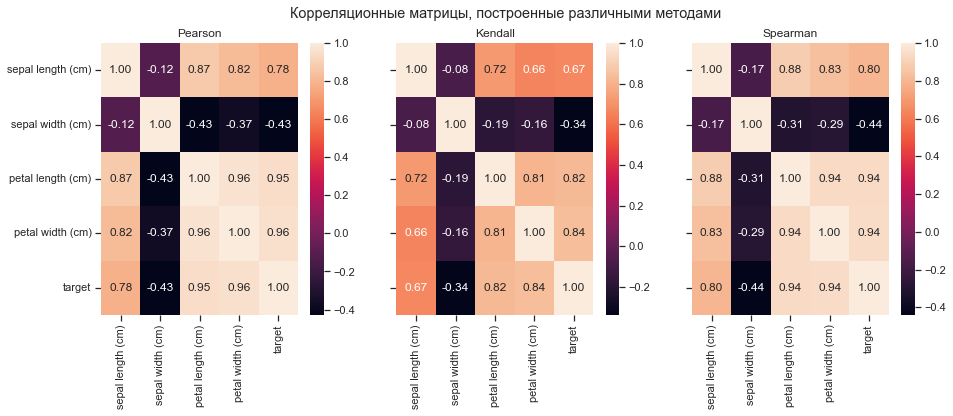

In [31]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')